In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import tf
import matplotlib
matplotlib.rc('animation', html='html5')
#%matplotlib inline

In [2]:
colors = {'red':  [1, 0, 0], 
          'green':[0, 1, 0], 
          'blue': [0, 0, 1]}

# Each arrow need three colors to specify the color of the arrow 
# -> one for the shaft and one for the head's right part and one for the head's left part 
cmap = [colors['red'],   # 1st shaft
        colors['green'], # 2nd shaft
        colors['blue'],  # 3rd shaft
        colors['red'],   # 1st Head of the 1st shaft
        colors['red'],   # 2nd Head of the 1st shaft
        colors['green'], # 1st Head of the 2nd shaft
        colors['green'], # 2nd Head of the 2nd shaft
        colors['blue'],  # 1st Head of the 3rd shaft
        colors['blue']]  # 2nd Head of the 3rd shaft

def plot_frame(T, l=0.3):
    """
    @param T: homogeneous transformation matrix that represent the frame
    @type  T: numpy.ndarray (4, 4)
    @param l: length of the frames' arrows
    @type  l: scalar
    """
    X, Y, Z = T[:-1, -1] # Frame's origin
    U, V, W = T[:3, :3]  # Unit vectors of the frame
    # Current axes plt.gca()
    plt.quiver(X, Y, Z, U, V, W, length=l, colors=cmap)
    
    
def plot_vector_wrt_frame(T0s, v0):
    """
    @param T0s: homogeneous transformation matrix that represent the frame
                {s} w.r.t. the global fixed frame 
    @type  T0s: numpy.ndarray (4, 4)
    @param  v0: the vector expressed in the global fixed frame
    @type   v0: numpy.ndarray (4,)
    """
    Ox, Oy, Oz = T0s[:-1, -1]
    Vx, Vy, Vz, _1 = v0
    # Current axes
    plt.quiver(Ox, Oy, Oz, Vx - Ox, Vy - Oy, Vz - Oz, arrow_length_ratio=0.05)

<IPython.core.display.Javascript object>


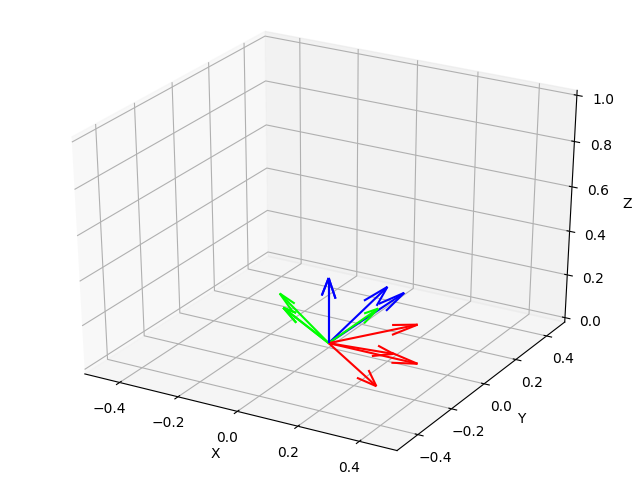

Text(0.5,0,'Z')

In [3]:
fig = plt.figure()
ax = p3.Axes3D(fig)

# Setting the axes properties
ax.set_xlim3d([-0.5, 0.5])
ax.set_xlabel('X')

ax.set_ylim3d([-0.5, 0.5])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

In [4]:
T = np.eye(4)
plot_frame(T)

In [5]:
R01 = tf.transformations.euler_matrix(0, 0, 1)
plot_frame(R01)

In [6]:
R12 = tf.transformations.euler_matrix(0, 1, 0)
R02 = np.dot(R01, R12)
plot_frame(R02)

In [7]:
R23 = tf.transformations.euler_matrix(0.5, 0, 0)
R03 = np.dot(R23, R02)
plot_frame(R03)

<IPython.core.display.Javascript object>


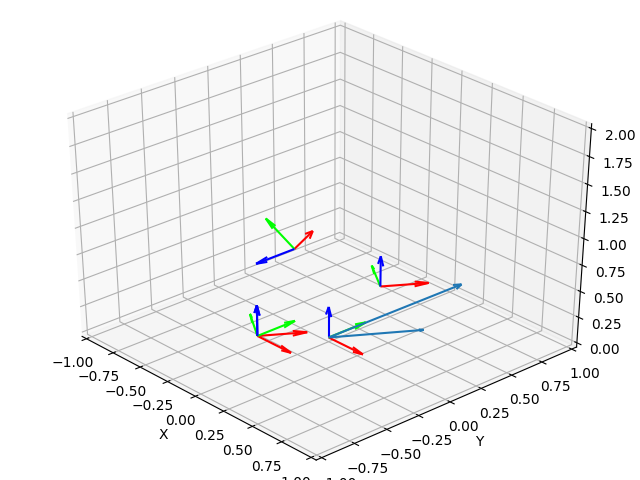

In [8]:
fig = plt.figure()
ax = p3.Axes3D(fig)

# Setting the axes properties
ax.set_xlim3d([-1.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([-1.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 2.0])
ax.set_zlabel('Z')

T = np.eye(4)
plot_frame(T)

In [9]:
T01 = tf.transformations.translation_matrix([-0.3, -0.3, 0])
plot_frame(T01)

In [10]:
T12 = tf.transformations.euler_matrix(0, 0, 1)
T02 = np.dot(T01, T12)
plot_frame(T02)

In [11]:
T23 = tf.transformations.translation_matrix([0, 1, 0])
T03 = np.dot(T23, T02)
plot_frame(T03)

In [12]:
T34 = tf.transformations.euler_matrix(1.57, 0, 0)
T04 = np.dot(T34, T03)
plot_frame(T04)

In [13]:
v0 = [0.5, 0.3, 0.2, 1]
plot_vector_wrt_frame(T, v0)

In [5]:
T01 = np.dot(tf.transformations.translation_matrix([-0.3, -0.3, 0]), tf.transformations.euler_matrix(0, 0, 1))

T12 = tf.transformations.translation_matrix([0, 0, 1])
T02 = np.dot(T01, T12)

T23 = tf.transformations.euler_matrix(1.57, 0, 0)
T03 = np.dot(T23, T02)

In [63]:
plot_vector_wrt_frame(T03, v0)

In [14]:
plot_vector_wrt_frame(np.eye(4), [1, 0.1, 1, 1])